Add the dependencies

In [39]:
import pandas as pd          
import numpy as np            

import matplotlib.pyplot as plt   
import seaborn as sns 

Import the relevant files, show preview, and all column and datatype breakdown

In [40]:
dataset = pd.read_csv("apple_stock.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906 entries, 0 to 10905
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10906 non-null  object 
 1   open            10906 non-null  float64
 2   high            10906 non-null  float64
 3   low             10906 non-null  float64
 4   close           10906 non-null  float64
 5   volume          10906 non-null  int64  
 6   raw_close       10906 non-null  float64
 7   change_percent  10906 non-null  float64
 8   avg_vol_20d     10906 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 767.0+ KB


Ensure that there are no NULL entries in our DataFrame

In [41]:
print(dataset.isnull().sum())

date              0
open              0
high              0
low               0
close             0
volume            0
raw_close         0
change_percent    0
avg_vol_20d       0
dtype: int64


Process histogram for each column

                       Min           Max              Mean       Median  \
open                0.0497        198.02         21.148846       0.5201   
high                0.0497        199.62         21.377147       0.5313   
low                 0.0491         197.0         20.929058       0.5133   
close               0.0491        198.11         21.162889      0.52205   
volume                   0    7421640800  320182608.719879  208000800.0   
raw_close          10.9984         702.1         113.42625      53.5024   
change_percent      -51.87         33.22          0.107111          0.0   
avg_vol_20d     14892640.0  1879186120.0   320173634.34145  224607980.0   

                         Std Dev  \
open                   43.794353   
high                   44.265704   
low                    43.352767   
close                  43.832043   
volume          336041635.174117   
raw_close             131.086949   
change_percent          2.791478   
avg_vol_20d      272050773.67134   


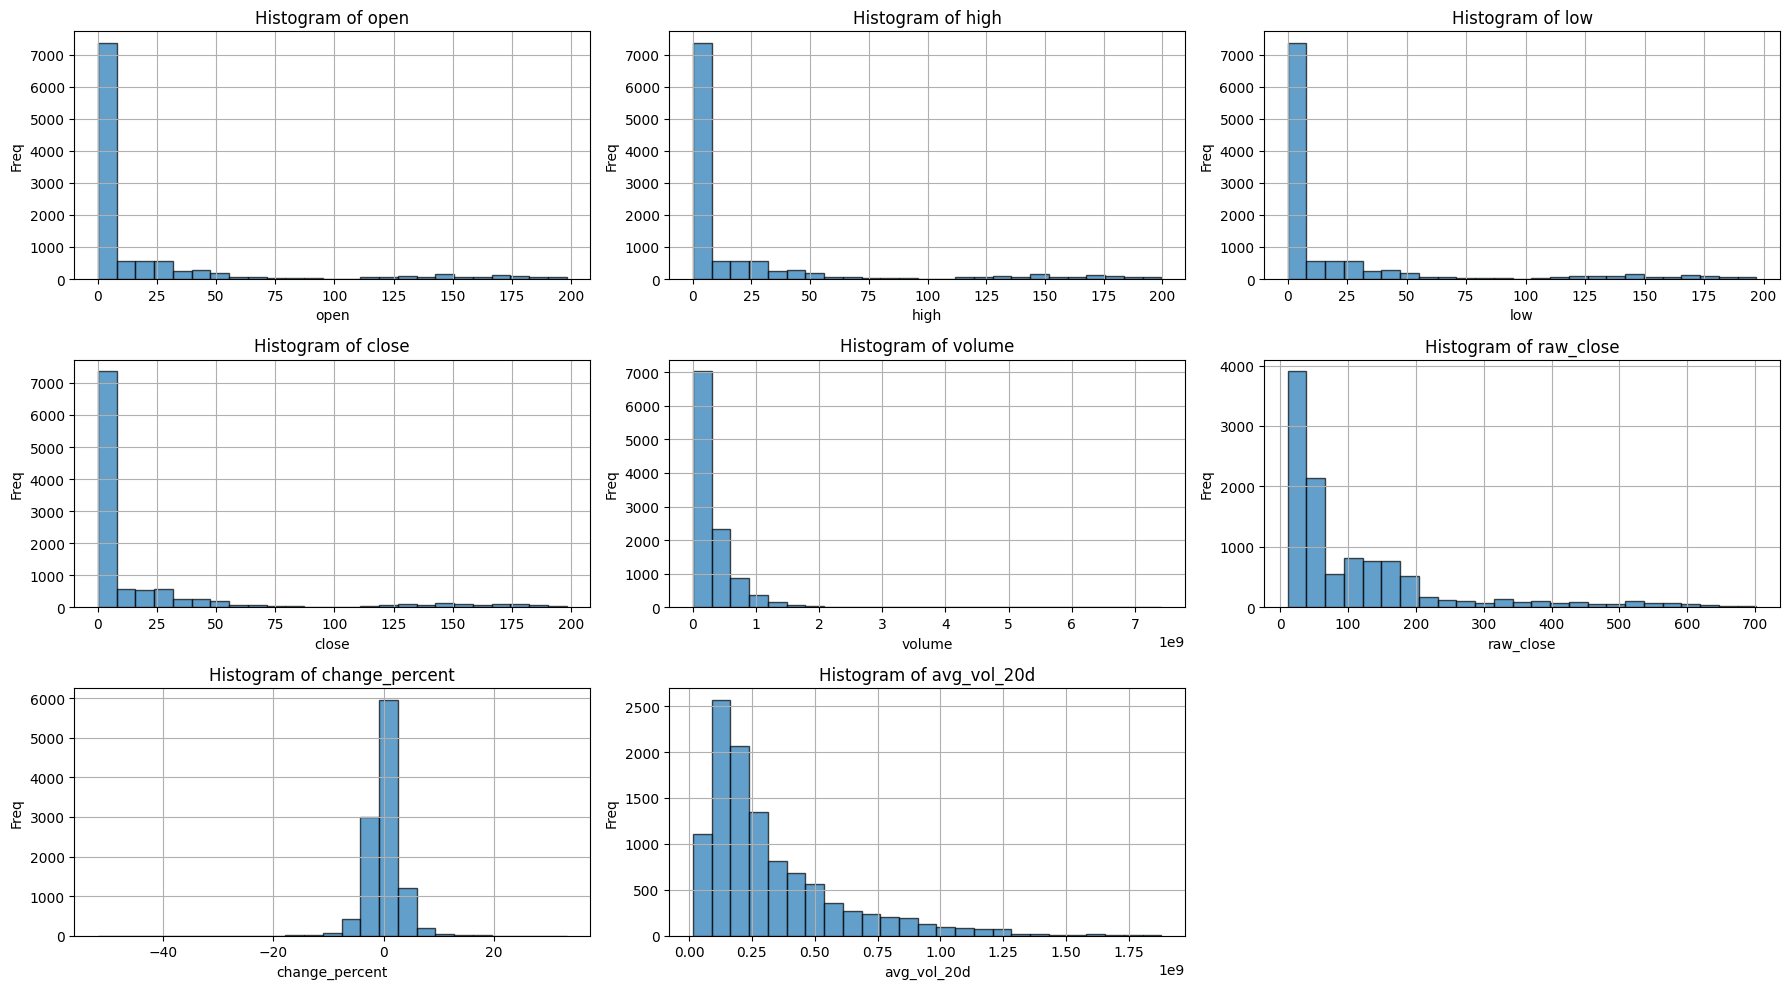

In [42]:
# Identify numerical and categorical features
numeric_features = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

stats_summary = {}

# Calculate summary statistics for numerical features
for feature in numeric_features:
    stats_summary[feature] = {
        'Min': dataset[feature].min(),
        'Max': dataset[feature].max(),
        'Mean': dataset[feature].mean(),
        'Median': dataset[feature].median(),
        'Std Dev': dataset[feature].std(),
    }

    # Calculate outliers using the IQR method
    first_quartile = dataset[feature].quantile(0.25)
    third_quartile = dataset[feature].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    lower_limit = first_quartile - 1.5 * interquartile_range
    upper_limit = third_quartile + 1.5 * interquartile_range
    outlier_data = dataset[(dataset[feature] < lower_limit) | (dataset[feature] > upper_limit)]
    stats_summary[feature]['Outliers'] = outlier_data[feature].tolist()

# Convert the statistics dictionary into a DataFrame
summary_df = pd.DataFrame(stats_summary).T
print(summary_df)

# Plot histograms for numerical features
plt.figure(figsize=(18, 10))
for index, feature in enumerate(numeric_features):
    plt.subplot(3, 3, index + 1)
    dataset[feature].hist(bins=25, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Freq')
plt.tight_layout()
plt.show()

Find the pairwise relationship

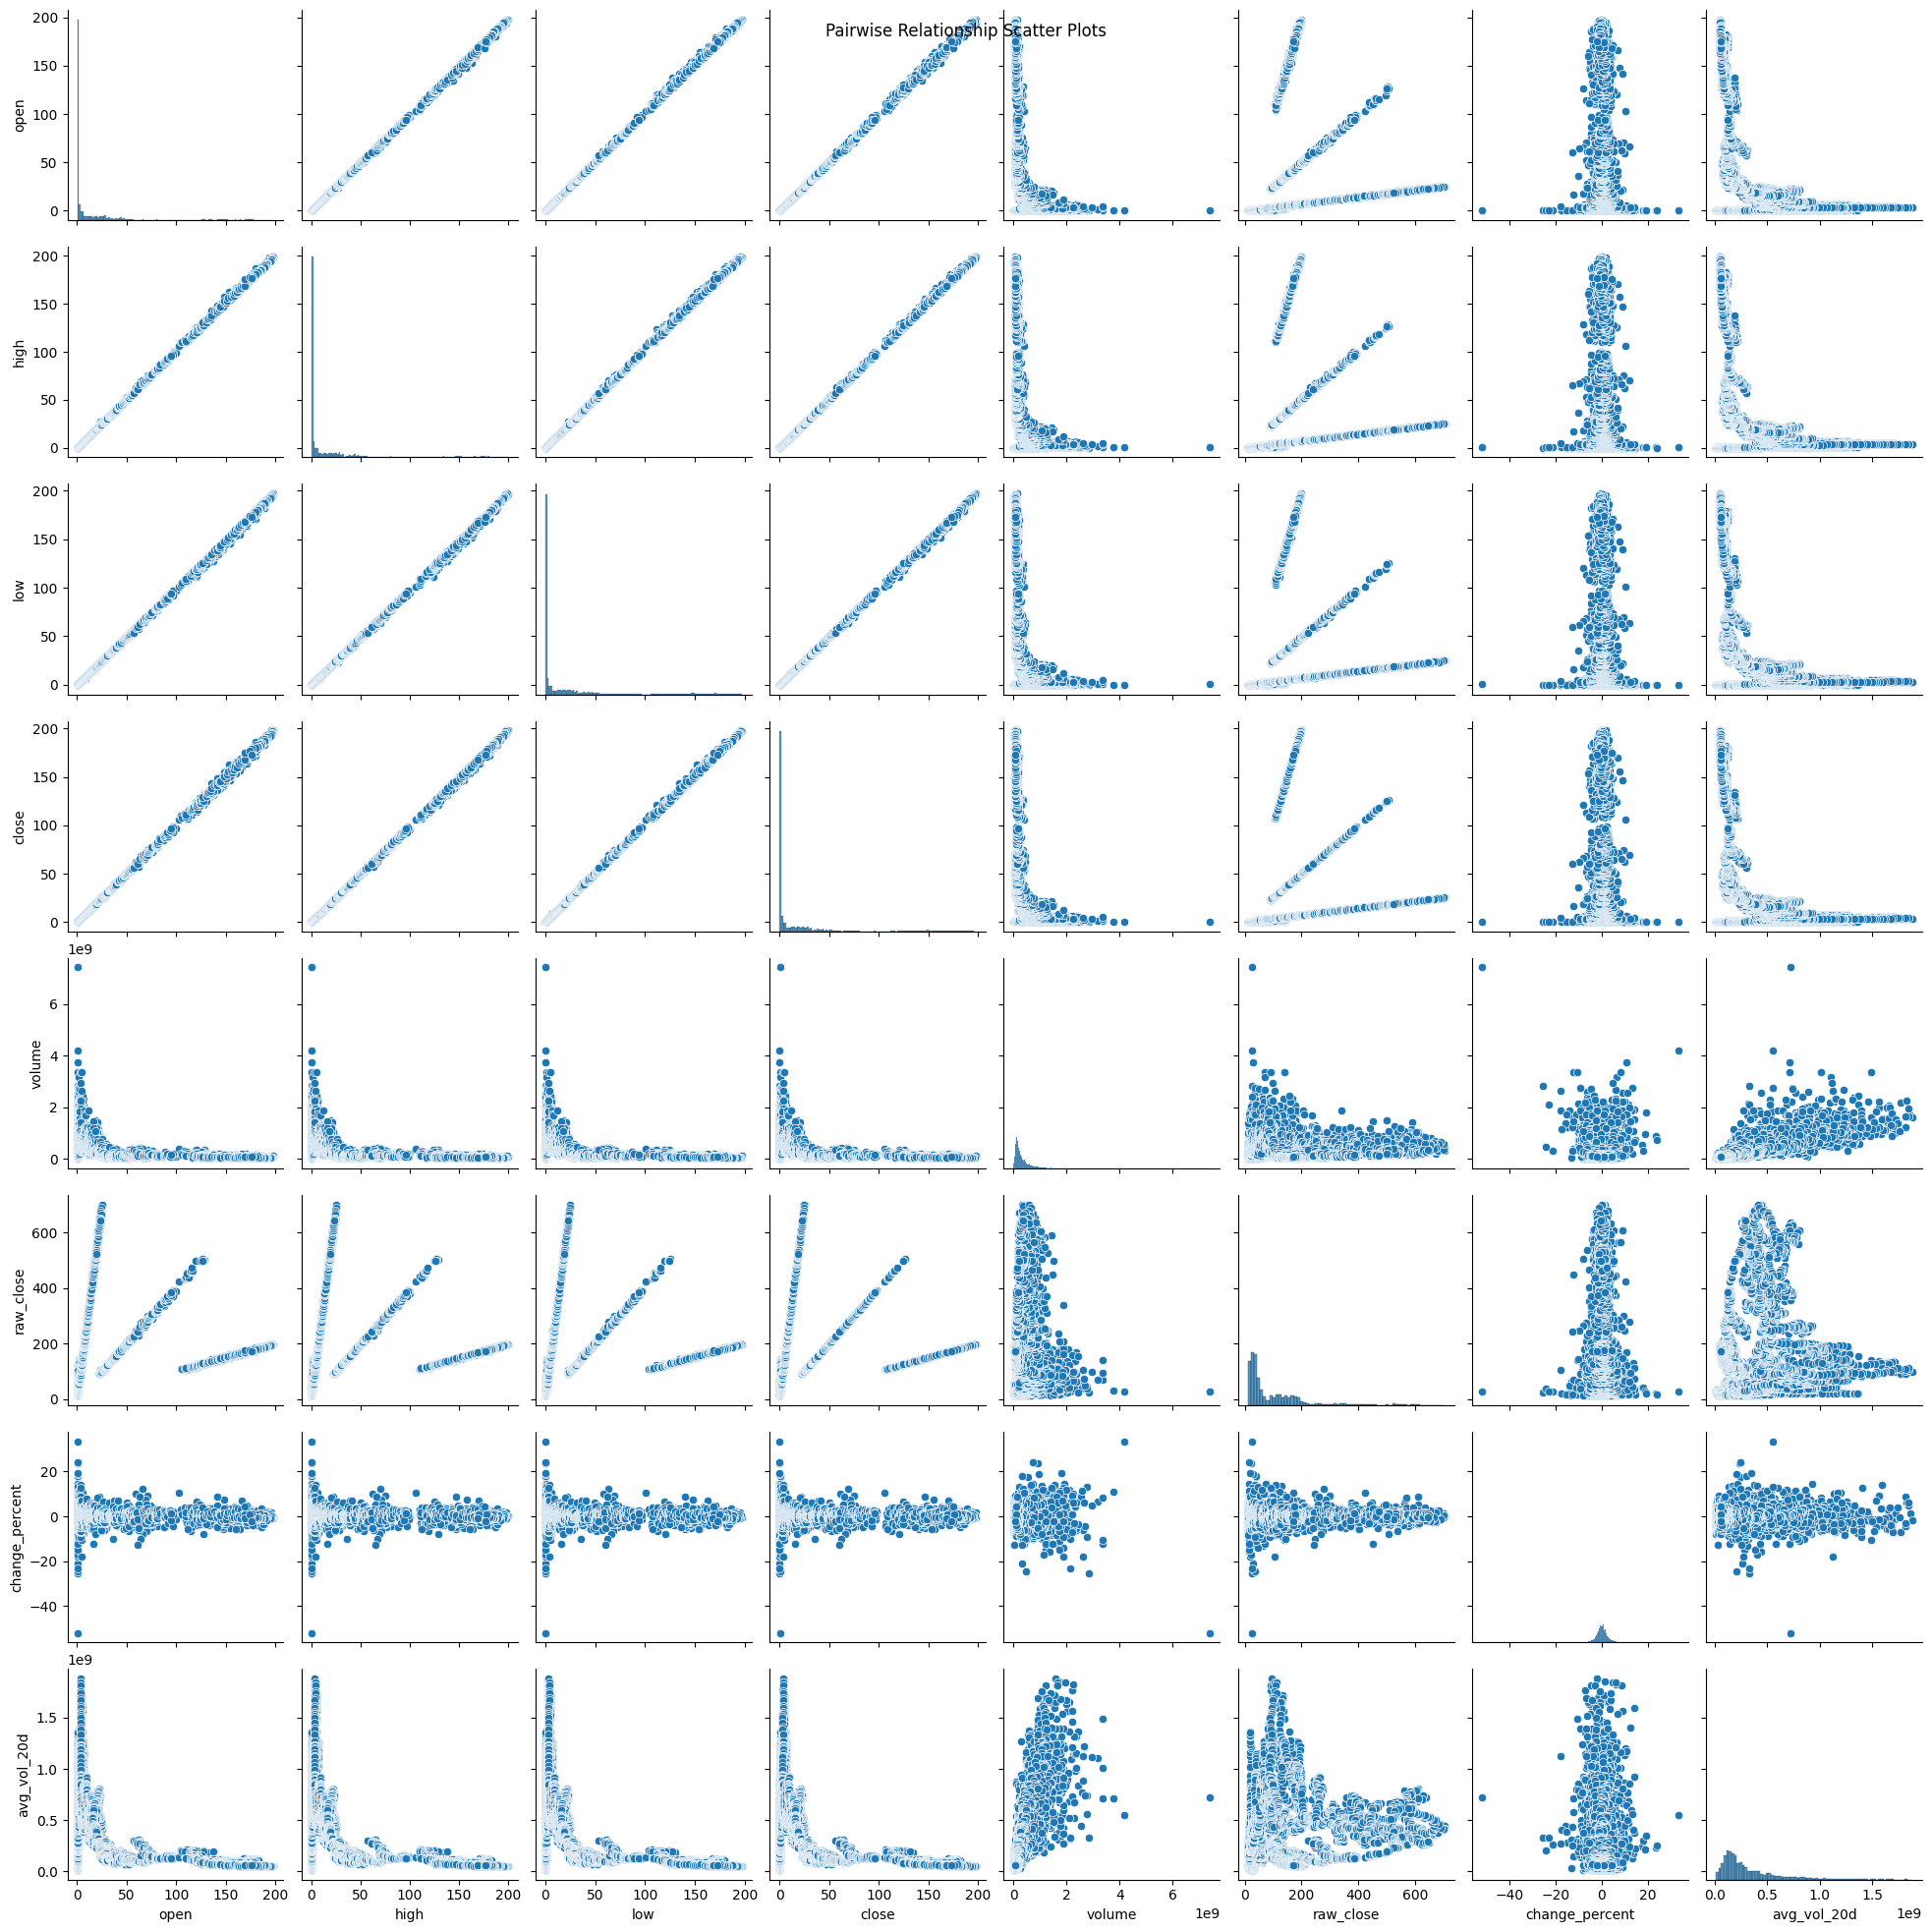

In [43]:
sns.pairplot(dataset[numeric_features])
plt.suptitle("Pairwise Relationship Scatter Plots")
plt.show()

Box plot for all numeric features

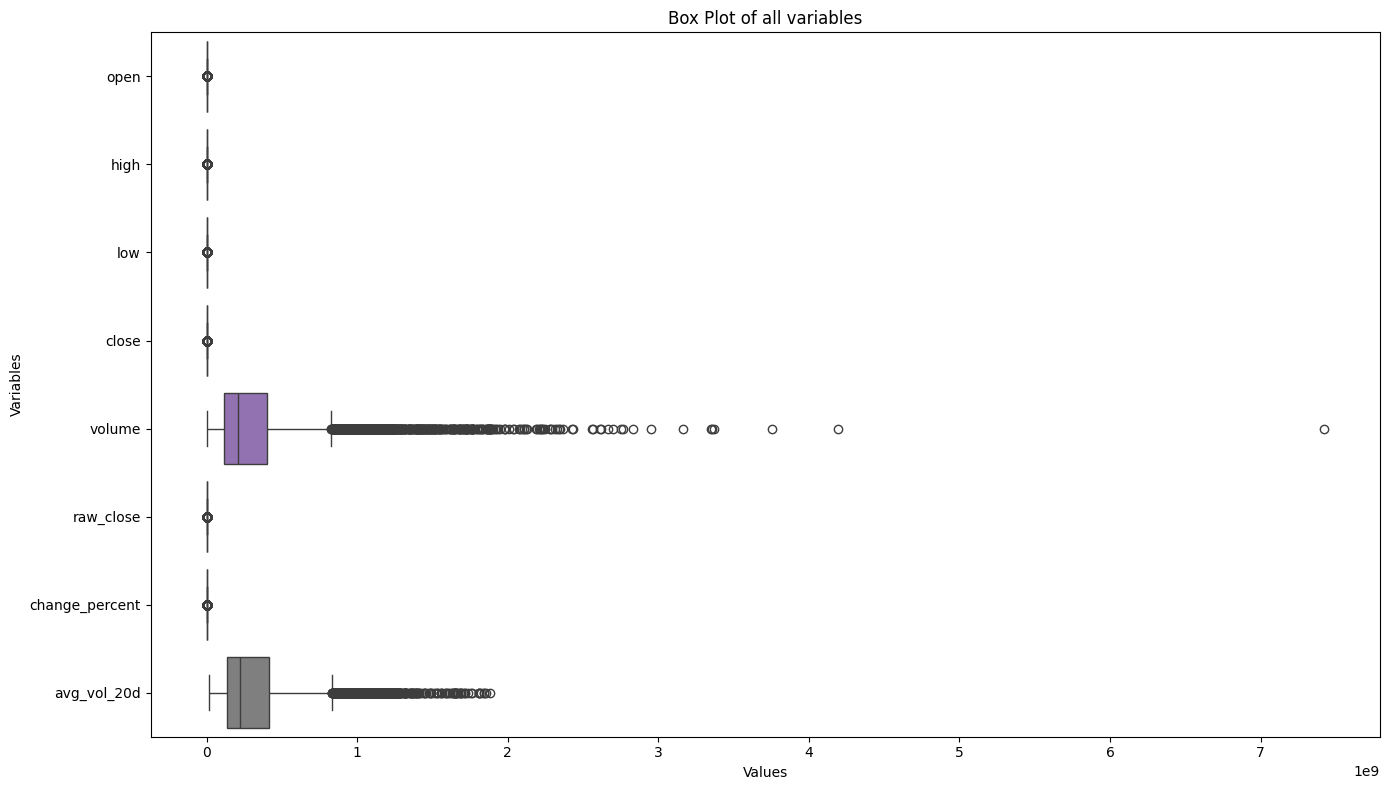

In [44]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataset[numeric_features], orient='h')
plt.title('Box Plot of all variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

Create a heatmap to compare variables

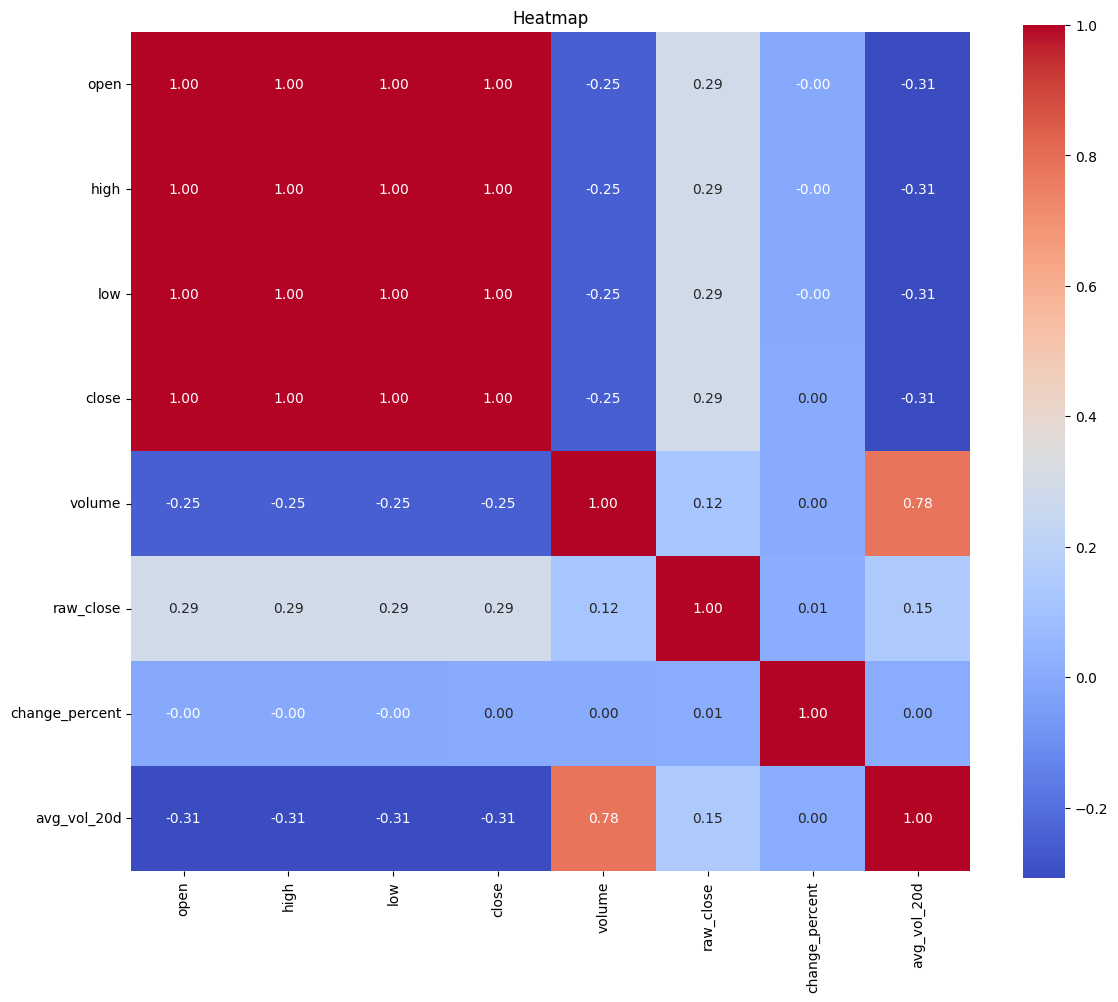

In [45]:
# Exclude the date column
correlation_matrix = dataset.select_dtypes(include=np.number).corr()

# Set up the figure for the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Title and labels
plt.title('Heatmap')

plt.tight_layout()
plt.show()